In [633]:
# Di spek disaranin pake scipy, harusnya tetep boleh pake numpy, pandas, matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import normaltest
from scipy.stats import norm

In [634]:
df = pd.read_csv("../dataset/banana.csv")

In [635]:
# Implementasi fungsi statistik

def mean(data: np.ndarray) -> float:
    total = 0
    for i in data:
        total += i
    return total / len(data)

def median(data: np.ndarray) -> float:
    data = np.sort(data)
    if len(data) % 2 == 0:
        return (data[len(data) // 2] + data[len(data) // 2 - 1]) / 2
    else:
        return data[len(data) // 2]

def mode(data: np.ndarray) -> float:
    data = np.sort(data)
    max_count = 0
    max_num = 0
    current_count = 0
    current_num = 0
    for i in data:
        if i == current_num:
            current_count += 1
        else:
            if current_count > max_count:
                max_count = current_count
                max_num = current_num
            current_count = 1
            current_num = i
    return max_num

def variance(data: np.ndarray) -> float:
    mean_data = mean(data)
    total = 0
    for i in data:
        total += (i - mean_data) ** 2
    return total / (len(data) - 1)

def std_dev(data: np.ndarray) -> float:
    return variance(data) ** 0.5

def data_range(data: np.ndarray) -> float:
    return max(data) - min(data)

def percentile(data: np.ndarray, p: float) -> float:
    data = np.sort(data)
    n = len(data)
    rank = p * (n - 1) / 100
    k = int(rank)
    d = rank - k
    return data[k] + d * (data[k + 1] - data[k])

def quartile(data: np.ndarray, q: int) -> float:
    if q == 1:
        return percentile(data, 25)
    elif q == 2:
        return percentile(data, 50)
    elif q == 3:
        return percentile(data, 75)
    
def iqr(data: np.ndarray) -> float:
    return quartile(data, 3) - quartile(data, 1)

def skewness(data: np.ndarray) -> float:
    mean_data = mean(data)
    std_dev_data = std_dev(data)
    total = 0
    for i in data:
        total += (i - mean_data) ** 3
    return total / (len(data) * std_dev_data ** 3)

def kurtosis(data: np.ndarray) -> float:
    mean_data = mean(data)
    std_dev_data = std_dev(data)
    total = 0
    for i in data:
        total += (i - mean_data) ** 4
    return total / (len(data) * std_dev_data ** 4) - 3

def unique(data: np.ndarray) -> np.ndarray:
    unique_data = []
    for i in data:
        if i not in unique_data:
            unique_data.append(i)
    return np.array(unique_data)

def proportion(data: np.ndarray) -> np.ndarray:
    unique_data = unique(data)
    data = np.sort(data)
    result = []
    for i in unique_data:
        result.append([i, len(data[data == i]) / len(data)])

    # Sort by proportion descending
    result = np.array(result)
    result = result[result[:, 1].argsort()[::-1]]
    return result

# 1. Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data. Data yang bersifat numerik dapat diberikan nilai mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis. Data dalam bentuk string dapat dicari unique values, dan proporsi nya. 

Terdapat 11 kolom pada data csv, yaitu Acidity, Weight, Length, Appearance, Tannin, Ripeness, Sweetness, Country_of_Origin, Firmness, Grade, dan Price. Berikut adalah deskripsi statistika dari masing-masing kolom.

In [636]:
# Acidity, bersifat numerik
acidity = df["Acidity"].values

# Menggunakan fungsi statistik yang telah dibuat
# Mean acidity
implemented_mean_acidity = mean(acidity)
# Median acidity
implemented_median_acidity = median(acidity)
# Mode acidity
implemented_mode_acidity = mode(acidity)
# Standard deviation acidity
implemented_std_acidity = std_dev(acidity)
# Variance acidity
implemented_var_acidity = variance(acidity)
# Range acidity
implemented_range_acidity = data_range(acidity)
# Minimum acidity
implemented_min_acidity = min(acidity)
# Maximum acidity
implemented_max_acidity = max(acidity)
# Q1 acidity
implemented_q1_acidity = quartile(acidity, 1)
# Q3 acidity
implemented_q3_acidity = quartile(acidity, 3)
# IQR acidity
implemented_iqr_acidity = iqr(acidity)
# Skewness acidity
implemented_skew_acidity = skewness(acidity)
# Kurtosis acidity
implemented_kurt_acidity = kurtosis(acidity)

# Menggunakan numpy
# Mean acidity
mean_acidity = np.mean(acidity)
# Median acidity
median_acidity = np.median(acidity)
# Mode acidity
mode_acidity = df["Acidity"].mode().values[0]
# Standard deviation acidity
std_acidity = np.std(acidity)
# Variance acidity
var_acidity = np.var(acidity)
# Range acidity
range_acidity = np.ptp(acidity)
# Minimum acidity
min_acidity = np.min(acidity)
# Maximum acidity
max_acidity = np.max(acidity)
# Q1 acidity
q1_acidity = np.percentile(acidity, 25)
# Q3 acidity
q3_acidity = np.percentile(acidity, 75)
# IQR acidity
iqr_acidity = q3_acidity - q1_acidity
# Skewness acidity
skew_acidity = df["Acidity"].skew()
# Kurtosis acidity
kurt_acidity = df["Acidity"].kurt()

# Acidity dataframe
df_acidity = pd.DataFrame({
    "Implemented": [implemented_mean_acidity, implemented_median_acidity, implemented_mode_acidity, implemented_std_acidity, implemented_var_acidity, implemented_range_acidity, implemented_min_acidity, implemented_max_acidity, implemented_q1_acidity, implemented_q3_acidity, implemented_iqr_acidity, implemented_skew_acidity, implemented_kurt_acidity],
    "Numpy": [mean_acidity, median_acidity, mode_acidity, std_acidity, var_acidity, range_acidity, min_acidity, max_acidity, q1_acidity, q3_acidity, iqr_acidity, skew_acidity, kurt_acidity]
}, index=["Mean", "Median", "Mode", "Standard Deviation", "Variance", "Range", "Minimum", "Maximum", "Q1", "Q3", "IQR", "Skewness", "Kurtosis"])

df_acidity

,Implemented,Numpy
Mean,8.014830,8.014830
Median,8.005347,8.005347
Mode,4.456118,4.456118
Standard Deviation,1.105781,1.105505
Variance,1.222752,1.222141
Range,6.962518,6.962518
Minimum,4.456118,4.456118
Maximum,11.418636,11.418636
Q1,7.259942,7.259942
Q3,8.758361,8.758361


In [637]:
# Weight, bersifat numerik
weight = df["Weight"].values

# Menggunakan fungsi statistik yang telah dibuat
# Mean weight
implemented_mean_weight = mean(weight)
# Median weight
implemented_median_weight = median(weight)
# Mode weight
implemented_mode_weight = mode(weight)
# Standard deviation weight
implemented_std_weight = std_dev(weight)
# Variance weight
implemented_var_weight = variance(weight)
# Range weight
implemented_range_weight = data_range(weight)
# Minimum weight
implemented_min_weight = min(weight)
# Maximum weight
implemented_max_weight = max(weight)
# Q1 weight
implemented_q1_weight = quartile(weight, 1)
# Q3 weight
implemented_q3_weight = quartile(weight, 3)
# IQR weight
implemented_iqr_weight = iqr(weight)
# Skewness weight
implemented_skew_weight = skewness(weight)
# Kurtosis weight
implemented_kurt_weight = kurtosis(weight)

# Menggunakan numpy
# Mean weight
mean_weight = np.mean(weight)
# Median weight
median_weight = np.median(weight)
# Mode weight
mode_weight = df["Weight"].mode().values[0]
# Standard deviation weight
std_weight = np.std(weight)
# Variance weight
var_weight = np.var(weight)
# Range weight
range_weight = np.ptp(weight)
# Minimum weight
min_weight = np.min(weight)
# Maximum weight
max_weight = np.max(weight)
# Q1 weight
q1_weight = np.percentile(weight, 25)
# Q3 weight
q3_weight = np.percentile(weight, 75)
# IQR weight
iqr_weight = q3_weight - q1_weight
# Skewness weight
skew_weight = df["Weight"].skew()
# Kurtosis weight
kurt_weight = df["Weight"].kurt()

# Weight dataframe
df_weight = pd.DataFrame({
    "Implemented": [implemented_mean_weight, implemented_median_weight, implemented_mode_weight, implemented_std_weight, implemented_var_weight, implemented_range_weight, implemented_min_weight, implemented_max_weight, implemented_q1_weight, implemented_q3_weight, implemented_iqr_weight, implemented_skew_weight, implemented_kurt_weight],
    "Numpy": [mean_weight, median_weight, mode_weight, std_weight, var_weight, range_weight, min_weight, max_weight, q1_weight, q3_weight, iqr_weight, skew_weight, kurt_weight]
}, index=["Mean", "Median", "Mode", "Standard Deviation", "Variance", "Range", "Minimum", "Maximum", "Q1", "Q3", "IQR", "Skewness", "Kurtosis"])

df_weight

,Implemented,Numpy
Mean,150.011549,150.011549
Median,150.022865,150.022865
Mode,146.060922,146.060922
Standard Deviation,1.194980,1.194681
Variance,1.427977,1.427263
Range,8.009448,8.009448
Minimum,146.060922,146.060922
Maximum,154.070370,154.070370
Q1,149.227116,149.227116
Q3,150.827613,150.827613


In [638]:
# Length, bersifat numerik
length = df["Length"].values

# Menggunakan fungsi statistik yang telah dibuat
# Mean length
implemented_mean_length = mean(length)
# Median length
implemented_median_length = median(length)
# Mode length
implemented_mode_length = mode(length)
# Standard deviation length
implemented_std_length = std_dev(length)
# Variance length
implemented_var_length = variance(length)
# Range length
implemented_range_length = data_range(length)
# Minimum length
implemented_min_length = min(length)
# Maximum length
implemented_max_length = max(length)
# Q1 length
implemented_q1_length = quartile(length, 1)
# Q3 length
implemented_q3_length = quartile(length, 3)
# IQR length
implemented_iqr_length = iqr(length)
# Skewness length
implemented_skew_length = skewness(length)
# Kurtosis length
implemented_kurt_length = kurtosis(length)

# Menggunakan numpy
# Mean length
mean_length = np.mean(length)
# Median length
median_length = np.median(length)
# Mode length
mode_length = df["Length"].mode().values[0]
# Standard deviation length
std_length = np.std(length)
# Variance length
var_length = np.var(length)
# Range length
range_length = np.ptp(length)
# Minimum length
min_length = np.min(length)
# Maximum length
max_length = np.max(length)
# Q1 length
q1_length = np.percentile(length, 25)
# Q3 length
q3_length = np.percentile(length, 75)
# IQR length
iqr_length = q3_length - q1_length
# Skewness length
skew_length = df["Length"].skew()
# Kurtosis length
kurt_length = df["Length"].kurt()

# Length dataframe
df_length = pd.DataFrame({
    "Implemented": [implemented_mean_length, implemented_median_length, implemented_mode_length, implemented_std_length, implemented_var_length, implemented_range_length, implemented_min_length, implemented_max_length, implemented_q1_length, implemented_q3_length, implemented_iqr_length, implemented_skew_length, implemented_kurt_length],
    "Numpy": [mean_length, median_length, mode_length, std_length, var_length, range_length, min_length, max_length, q1_length, q3_length, iqr_length, skew_length, kurt_length]
}, index=["Mean", "Median", "Mode", "Standard Deviation", "Variance", "Range", "Minimum", "Maximum", "Q1", "Q3", "IQR", "Skewness", "Kurtosis"])

df_length

,Implemented,Numpy
Mean,49.950434,49.950434
Median,49.923682,49.923682
Mode,46.418052,46.418052
Standard Deviation,0.894599,0.894375
Variance,0.800307,0.799907
Range,6.647099,6.647099
Minimum,46.418052,46.418052
Maximum,53.065151,53.065151
Q1,49.346508,49.346508
Q3,50.572027,50.572027


In [639]:
# Appearance, bersifat numerik
appearance = df["Appearance"].values

# Menggunakan fungsi statistik yang telah dibuat
# Mean appearance
implemented_mean_appearance = mean(appearance)
# Median appearance
implemented_median_appearance = median(appearance)
# Mode appearance
implemented_mode_appearance = mode(appearance)
# Standard deviation appearance
implemented_std_appearance = std_dev(appearance)
# Variance appearance
implemented_var_appearance = variance(appearance)
# Range appearance
implemented_range_appearance = data_range(appearance)
# Minimum appearance
implemented_min_appearance = min(appearance)
# Maximum appearance
implemented_max_appearance = max(appearance)
# Q1 appearance
implemented_q1_appearance = quartile(appearance, 1)
# Q3 appearance
implemented_q3_appearance = quartile(appearance, 3)
# IQR appearance
implemented_iqr_appearance = iqr(appearance)
# Skewness appearance
implemented_skew_appearance = skewness(appearance)
# Kurtosis appearance
implemented_kurt_appearance = kurtosis(appearance)

# Menggunakan numpy
# Mean appearance
mean_appearance = np.mean(appearance)
# Median appearance
median_appearance = np.median(appearance)
# Mode appearance
mode_appearance = df["Appearance"].mode().values[0]
# Standard deviation appearance
std_appearance = np.std(appearance)
# Variance appearance
var_appearance = np.var(appearance)
# Range appearance
range_appearance = np.ptp(appearance)
# Minimum appearance
min_appearance = np.min(appearance)
# Maximum appearance
max_appearance = np.max(appearance)
# Q1 appearance
q1_appearance = np.percentile(appearance, 25)
# Q3 appearance
q3_appearance = np.percentile(appearance, 75)
# IQR appearance
iqr_appearance = q3_appearance - q1_appearance
# Skewness appearance
skew_appearance = df["Appearance"].skew()
# Kurtosis appearance
kurt_appearance = df["Appearance"].kurt()

# Appearance dataframe
df_appearance = pd.DataFrame({
    "Implemented": [implemented_mean_appearance, implemented_median_appearance, implemented_mode_appearance, implemented_std_appearance, implemented_var_appearance, implemented_range_appearance, implemented_min_appearance, implemented_max_appearance, implemented_q1_appearance, implemented_q3_appearance, implemented_iqr_appearance, implemented_skew_appearance, implemented_kurt_appearance],
    "Numpy": [mean_appearance, median_appearance, mode_appearance, std_appearance, var_appearance, range_appearance, min_appearance, max_appearance, q1_appearance, q3_appearance, iqr_appearance, skew_appearance, kurt_appearance]
}, index=["Mean", "Median", "Mode", "Standard Deviation", "Variance", "Range", "Minimum", "Maximum", "Q1", "Q3", "IQR", "Skewness", "Kurtosis"])

df_appearance

,Implemented,Numpy
Mean,4.965595,4.965595
Median,4.979534,4.979534
Mode,1.775864,1.775864
Standard Deviation,1.014863,1.014609
Variance,1.029946,1.029431
Range,6.458104,6.458104
Minimum,1.775864,1.775864
Maximum,8.233968,8.233968
Q1,4.258210,4.258210
Q3,5.653875,5.653875


In [640]:
# Tannin, bersifat numerik
tannin = df["Tannin"].values

# Menggunakan fungsi statistik yang telah dibuat
# Mean tannin
implemented_mean_tannin = mean(tannin)
# Median tannin
implemented_median_tannin = median(tannin)
# Mode tannin
implemented_mode_tannin = mode(tannin)
# Standard deviation tannin
implemented_std_tannin = std_dev(tannin)
# Variance tannin
implemented_var_tannin = variance(tannin)
# Range tannin
implemented_range_tannin = data_range(tannin)
# Minimum tannin
implemented_min_tannin = min(tannin)
# Maximum tannin
implemented_max_tannin = max(tannin)
# Q1 tannin
implemented_q1_tannin = quartile(tannin, 1)
# Q3 tannin
implemented_q3_tannin = quartile(tannin, 3)
# IQR tannin
implemented_iqr_tannin = iqr(tannin)
# Skewness tannin
implemented_skew_tannin = skewness(tannin)
# Kurtosis tannin
implemented_kurt_tannin = kurtosis(tannin)

# Menggunakan numpy
# Mean tannin
mean_tannin = np.mean(tannin)
# Median tannin
median_tannin = np.median(tannin)
# Mode tannin
mode_tannin = df["Tannin"].mode().values[0]
# Standard deviation tannin
std_tannin = np.std(tannin)
# Variance tannin
var_tannin = np.var(tannin)
# Range tannin
range_tannin = np.ptp(tannin)
# Minimum tannin
min_tannin = np.min(tannin)
# Maximum tannin
max_tannin = np.max(tannin)
# Q1 tannin
q1_tannin = np.percentile(tannin, 25)
# Q3 tannin
q3_tannin = np.percentile(tannin, 75)
# IQR tannin
iqr_tannin = q3_tannin - q1_tannin
# Skewness tannin
skew_tannin = df["Tannin"].skew()
# Kurtosis tannin
kurt_tannin = df["Tannin"].kurt()

# Tannin dataframe
df_tannin = pd.DataFrame({
    "Implemented": [implemented_mean_tannin, implemented_median_tannin, implemented_mode_tannin, implemented_std_tannin, implemented_var_tannin, implemented_range_tannin, implemented_min_tannin, implemented_max_tannin, implemented_q1_tannin, implemented_q3_tannin, implemented_iqr_tannin, implemented_skew_tannin, implemented_kurt_tannin],
    "Numpy": [mean_tannin, median_tannin, mode_tannin, std_tannin, var_tannin, range_tannin, min_tannin, max_tannin, q1_tannin, q3_tannin, iqr_tannin, skew_tannin, kurt_tannin]
}, index=["Mean", "Median", "Mode", "Standard Deviation", "Variance", "Range", "Minimum", "Maximum", "Q1", "Q3", "IQR", "Skewness", "Kurtosis"])

df_tannin

,Implemented,Numpy
Mean,7.965435,7.965435
Median,8.022448,8.022448
Mode,4.291274,4.291274
Standard Deviation,1.217188,1.216883
Variance,1.481546,1.480805
Range,8.124904,8.124904
Minimum,4.291274,4.291274
Maximum,12.416177,12.416177
Q1,7.167241,7.167241
Q3,8.792184,8.792184


In [641]:
# Ripeness, bersifat numerik
ripeness = df["Ripeness"].values

# Menggunakan fungsi statistik yang telah dibuat
# Mean ripeness
implemented_mean_ripeness = mean(ripeness)
# Median ripeness
implemented_median_ripeness = median(ripeness)
# Mode ripeness
implemented_mode_ripeness = mode(ripeness)
# Standard deviation ripeness
implemented_std_ripeness = std_dev(ripeness)
# Variance ripeness
implemented_var_ripeness = variance(ripeness)
# Range ripeness
implemented_range_ripeness = data_range(ripeness)
# Minimum ripeness
implemented_min_ripeness = min(ripeness)
# Maximum ripeness
implemented_max_ripeness = max(ripeness)
# Q1 ripeness
implemented_q1_ripeness = quartile(ripeness, 1)
# Q3 ripeness
implemented_q3_ripeness = quartile(ripeness, 3)
# IQR ripeness
implemented_iqr_ripeness = iqr(ripeness)
# Skewness ripeness
implemented_skew_ripeness = skewness(ripeness)
# Kurtosis ripeness
implemented_kurt_ripeness = kurtosis(ripeness)

# Menggunakan numpy
# Mean ripeness
mean_ripeness = np.mean(ripeness)
# Median ripeness
median_ripeness = np.median(ripeness)
# Mode ripeness
mode_ripeness = df["Ripeness"].mode().values[0]
# Standard deviation ripeness
std_ripeness = np.std(ripeness)
# Variance ripeness
var_ripeness = np.var(ripeness)
# Range ripeness
range_ripeness = np.ptp(ripeness)
# Minimum ripeness
min_ripeness = np.min(ripeness)
# Maximum ripeness
max_ripeness = np.max(ripeness)
# Q1 ripeness
q1_ripeness = np.percentile(ripeness, 25)
# Q3 ripeness
q3_ripeness = np.percentile(ripeness, 75)
# IQR ripeness
iqr_ripeness = q3_ripeness - q1_ripeness
# Skewness ripeness
skew_ripeness = df["Ripeness"].skew()
# Kurtosis ripeness
kurt_ripeness = df["Ripeness"].kurt()

# Ripeness dataframe
df_ripeness = pd.DataFrame({
    "Implemented": [implemented_mean_ripeness, implemented_median_ripeness, implemented_mode_ripeness, implemented_std_ripeness, implemented_var_ripeness, implemented_range_ripeness, implemented_min_ripeness, implemented_max_ripeness, implemented_q1_ripeness, implemented_q3_ripeness, implemented_iqr_ripeness, implemented_skew_ripeness, implemented_kurt_ripeness],
    "Numpy": [mean_ripeness, median_ripeness, mode_ripeness, std_ripeness, var_ripeness, range_ripeness, min_ripeness, max_ripeness, q1_ripeness, q3_ripeness, iqr_ripeness, skew_ripeness, kurt_ripeness]
}, index=["Mean", "Median", "Mode", "Standard Deviation", "Variance", "Range", "Minimum", "Maximum", "Q1", "Q3", "IQR", "Skewness", "Kurtosis"])

df_ripeness

,Implemented,Numpy
Mean,6.743434,6.743434
Median,6.667618,6.667618
Mode,4.862560,4.862560
Standard Deviation,0.680320,0.680150
Variance,0.462836,0.462604
Range,4.619506,4.619506
Minimum,4.862560,4.862560
Maximum,9.482066,9.482066
Q1,6.268258,6.268258
Q3,7.164813,7.164813


In [642]:
# Sweetness, bersifat numerik
sweetness = df["Sweetness"].values

# Menggunakan fungsi statistik yang telah dibuat
# Mean sweetness
mean_sweetness = mean(sweetness)
# Median sweetness
median_sweetness = median(sweetness)
# Mode sweetness
mode_sweetness = mode(sweetness)
# Standard deviation sweetness
std_sweetness = std_dev(sweetness)
# Variance sweetness
var_sweetness = variance(sweetness)
# Range sweetness
range_sweetness = data_range(sweetness)
# Minimum sweetness
min_sweetness = min(sweetness)
# Maximum sweetness
max_sweetness = max(sweetness)
# Q1 sweetness
q1_sweetness = quartile(sweetness, 1)
# Q3 sweetness
q3_sweetness = quartile(sweetness, 3)
# IQR sweetness
iqr_sweetness = iqr(sweetness)
# Skewness sweetness
skew_sweetness = skewness(sweetness)
# Kurtosis sweetness
kurt_sweetness = kurtosis(sweetness)

# Menggunakan numpy
# Mean sweetness
mean_sweetness_np = np.mean(sweetness)
# Median sweetness
median_sweetness_np = np.median(sweetness)
# Mode sweetness
mode_sweetness_np = df["Sweetness"].mode().values[0]
# Standard deviation sweetness
std_sweetness_np = np.std(sweetness)
# Variance sweetness
var_sweetness_np = np.var(sweetness)
# Range sweetness
range_sweetness_np = np.ptp(sweetness)
# Minimum sweetness
min_sweetness_np = np.min(sweetness)
# Maximum sweetness
max_sweetness_np = np.max(sweetness)
# Q1 sweetness
q1_sweetness_np = np.percentile(sweetness, 25)
# Q3 sweetness
q3_sweetness_np = np.percentile(sweetness, 75)
# IQR sweetness
iqr_sweetness_np = q3_sweetness_np - q1_sweetness_np
# Skewness sweetness
skew_sweetness_np = df["Sweetness"].skew()
# Kurtosis sweetness
kurt_sweetness_np = df["Sweetness"].kurt()

# Sweetness dataframe
df_sweetness = pd.DataFrame({
    "Custom": [mean_sweetness, median_sweetness, mode_sweetness, std_sweetness, var_sweetness, range_sweetness, min_sweetness, max_sweetness, q1_sweetness, q3_sweetness, iqr_sweetness, skew_sweetness, kurt_sweetness],
    "Numpy": [mean_sweetness_np, median_sweetness_np, mode_sweetness_np, std_sweetness_np, var_sweetness_np, range_sweetness_np, min_sweetness_np, max_sweetness_np, q1_sweetness_np, q3_sweetness_np, iqr_sweetness_np, skew_sweetness_np, kurt_sweetness_np]
}, index=["Mean", "Median", "Mode", "Standard Deviation", "Variance", "Range", "Minimum", "Maximum", "Q1", "Q3", "IQR", "Skewness", "Kurtosis"])

df_sweetness

,Custom,Numpy
Mean,6.226319,6.226319
Median,6.312819,6.312819
Mode,3.033193,3.033193
Standard Deviation,0.662980,0.662814
Variance,0.439543,0.439323
Range,4.645496,4.645496
Minimum,3.033193,3.033193
Maximum,7.678689,7.678689
Q1,5.808028,5.808028
Q3,6.714660,6.714660


In [643]:
# Country_of_Origin, bersifat string
country_of_origin = df["Country_of_Origin"].values

# Menggunakan fungsi statistik yang telah dibuat
# Unique values country_of_origin
implemented_unique_country_of_origin = unique(country_of_origin)
# Proportion country_of_origin
implemented_proportion_country_of_origin = proportion(country_of_origin)

# Menggunakan numpy
# Unique values country_of_origin
unique_country_of_origin = df["Country_of_Origin"].unique()
# Proportion country_of_origin
proportion_country_of_origin = df["Country_of_Origin"].value_counts(normalize=True)

# Implemented
print("Unique values country_of_origin (Implemented):")
for i in implemented_unique_country_of_origin:
    print(i)
print()

# Numpy
print("Unique values country_of_origin (Numpy):")
for i in unique_country_of_origin:
    print(i)
print()

# Merge dataframe
df_country_of_origin = pd.DataFrame({
    "Implemented": implemented_proportion_country_of_origin[:, 1],
    "Numpy": proportion_country_of_origin.values
}, index=proportion_country_of_origin.index)

df_country_of_origin

Unique values country_of_origin (Implemented):
Costa Rica
Colombia
Ecuador
undefined

Unique values country_of_origin (Numpy):
Costa Rica
Colombia
Ecuador
undefined



,Implemented,Numpy
Country_of_Origin,,
Ecuador,0.5605,0.5605
Costa Rica,0.285,0.2850
Colombia,0.153,0.1530
undefined,0.0015,0.0015


In [644]:
# Firmness, bersifat numerik
firmness = df["Firmness"].values

# Menggunakan fungsi statistik yang telah dibuat
# Mean firmness
mean_firmness = mean(firmness)
# Median firmness
median_firmness = median(firmness)
# Mode firmness
mode_firmness = mode(firmness)
# Standard deviation firmness
std_firmness = std_dev(firmness)
# Variance firmness
var_firmness = variance(firmness)
# Range firmness
range_firmness = data_range(firmness)
# Minimum firmness
min_firmness = min(firmness)
# Maximum firmness
max_firmness = max(firmness)
# Q1 firmness
q1_firmness = quartile(firmness, 1)
# Q3 firmness
q3_firmness = quartile(firmness, 3)
# IQR firmness
iqr_firmness = iqr(firmness)
# Skewness firmness
skew_firmness = skewness(firmness)
# Kurtosis firmness
kurt_firmness = kurtosis(firmness)

# Menggunakan numpy
# Mean firmness
mean_firmness_np = np.mean(firmness)
# Median firmness
median_firmness_np = np.median(firmness)
# Mode firmness
mode_firmness_np = df["Firmness"].mode().values[0]
# Standard deviation firmness
std_firmness_np = np.std(firmness)
# Variance firmness
var_firmness_np = np.var(firmness)
# Range firmness
range_firmness_np = np.ptp(firmness)
# Minimum firmness
min_firmness_np = np.min(firmness)
# Maximum firmness
max_firmness_np = np.max(firmness)
# Q1 firmness
q1_firmness_np = np.percentile(firmness, 25)
# Q3 firmness
q3_firmness_np = np.percentile(firmness, 75)
# IQR firmness
iqr_firmness_np = q3_firmness_np - q1_firmness_np
# Skewness firmness
skew_firmness_np = df["Firmness"].skew()
# Kurtosis firmness
kurt_firmness_np = df["Firmness"].kurt()

# Firmness dataframe
df_firmness = pd.DataFrame({
    "Custom": [mean_firmness, median_firmness, mode_firmness, std_firmness, var_firmness, range_firmness, min_firmness, max_firmness, q1_firmness, q3_firmness, iqr_firmness, skew_firmness, kurt_firmness],
    "Numpy": [mean_firmness_np, median_firmness_np, mode_firmness_np, std_firmness_np, var_firmness_np, range_firmness_np, min_firmness_np, max_firmness_np, q1_firmness_np, q3_firmness_np, iqr_firmness_np, skew_firmness_np, kurt_firmness_np]
}, index=["Mean", "Median", "Mode", "Standard Deviation", "Variance", "Range", "Minimum", "Maximum", "Q1", "Q3", "IQR", "Skewness", "Kurtosis"])

df_firmness

,Custom,Numpy
Mean,0.507790,0.507790
Median,0.515483,0.515483
Mode,0.000254,0.000254
Standard Deviation,0.292226,0.292153
Variance,0.085396,0.085353
Range,1.999746,1.999746
Minimum,0.000254,0.000254
Maximum,2.000000,2.000000
Q1,0.254351,0.254351
Q3,0.758786,0.758786


In [645]:
# Grade, bersifat string
grade = df["Grade"].values

# Menggunakan fungsi statistik yang telah dibuat
# Unique values grade
implemented_unique_grade = unique(grade)
# Proportion grade
implemented_proportion_grade = proportion(grade)

# Menggunakan numpy
# Unique values grade
unique_grade = df["Grade"].unique()
# Proportion grade
proportion_grade = df["Grade"].value_counts(normalize=True)

# Implemented
print("Unique values grade (Implemented):")
for i in implemented_unique_grade:
    print(i)
print()

# Numpy
print("Unique values grade (Numpy):")
for i in unique_grade:
    print(i)
print()

# Merge dataframe
df_grade = pd.DataFrame({
    "Implemented": implemented_proportion_grade[:, 1],
    "Numpy": proportion_grade.values
}, index=proportion_grade.index)

df_grade

Unique values grade (Implemented):
A
C
B

Unique values grade (Numpy):
A
C
B



,Implemented,Numpy
Grade,,
A,0.3415,0.3415
C,0.339,0.3390
B,0.3195,0.3195


In [646]:
# Price, bersifat numerik
price = df["Price"].values

# Menggunakan fungsi statistik yang telah dibuat
# Mean price
mean_price = mean(price)
# Median price
median_price = median(price)
# Mode price
mode_price = mode(price)
# Standard deviation price
std_price = std_dev(price)
# Variance price
var_price = variance(price)
# Range price
range_price = data_range(price)
# Minimum price
min_price = min(price)
# Maximum price
max_price = max(price)
# Q1 price
q1_price = quartile(price, 1)
# Q3 price
q3_price = quartile(price, 3)
# IQR price
iqr_price = iqr(price)
# Skewness price
skew_price = skewness(price)
# Kurtosis price
kurt_price = kurtosis(price)

# Menggunakan numpy
# Mean price
mean_price_np = np.mean(price)
# Median price
median_price_np = np.median(price)
# Mode price
mode_price_np = df["Price"].mode().values[0]
# Standard deviation price
std_price_np = np.std(price)
# Variance price
var_price_np = np.var(price)
# Range price
range_price_np = np.ptp(price)
# Minimum price
min_price_np = np.min(price)
# Maximum price
max_price_np = np.max(price)
# Q1 price
q1_price_np = np.percentile(price, 25)
# Q3 price
q3_price_np = np.percentile(price, 75)
# IQR price
iqr_price_np = q3_price_np - q1_price_np
# Skewness price
skew_price_np = df["Price"].skew()
# Kurtosis price
kurt_price_np = df["Price"].kurt()

# Price dataframe
df_price = pd.DataFrame({
    "Custom": [mean_price, median_price, mode_price, std_price, var_price, range_price, min_price, max_price, q1_price, q3_price, iqr_price, skew_price, kurt_price],
    "Numpy": [mean_price_np, median_price_np, mode_price_np, std_price_np, var_price_np, range_price_np, min_price_np, max_price_np, q1_price_np, q3_price_np, iqr_price_np, skew_price_np, kurt_price_np]
}, index=["Mean", "Median", "Mode", "Standard Deviation", "Variance", "Range", "Minimum", "Maximum", "Q1", "Q3", "IQR", "Skewness", "Kurtosis"])

df_price

,Custom,Numpy
Mean,19969.669241,19969.669241
Median,19999.508312,19999.508312
Mode,0.000000,0.000000
Standard Deviation,777.347464,777.153103
Variance,604269.080280,603966.945740
Range,20282.431062,20282.431062
Minimum,-1.000000,-1.000000
Maximum,20281.431062,20281.431062
Q1,19953.093529,19953.093529
Q3,20047.301949,20047.301949


# 2. Apakah pada data tersebut terdapat outlier? Jika ya, dapatkah anda menanganinya? Jelaskan apa yang umumnya dilakukan untuk menangani outlier.


Data memiliki outlier pada beberapa kolom. Dibawah akan dicetak semua kolom outlier dan juga masing-masing jumlahnya.

Data outlier ini dapat ditangani. Beberapa metode yang dapat digunakan untuk menangani outlier adalah dengan menghapus data outlier atau mengganti data outlier dengan nilai yang lebih masuk akal seperti mengganti dengan nilai mean, median, atau mode nya.

Dalam tugas ini, kami menangani data outlier dengan cara yang pertama, yaitu menghapus data outlier tersebut.

In [647]:
# Cari outlier untuk acidity
# Outlier outlier: X < Q1 - 1.5 * IQR atau X > Q3 + 1.5 * IQR
acidity_lower_outlier_limit = quartile(acidity, 1) - 1.5 * iqr(acidity)
acidity_higher_outlier_limit = quartile(acidity, 3) + 1.5 * iqr(acidity)

outliers_acidity = []
cleaned_acidity = []
for i in acidity:
    if i < acidity_lower_outlier_limit or i > acidity_higher_outlier_limit:
        outliers_acidity.append(i)
    else:
        cleaned_acidity.append(i)

# Output
print(f"Ada {len(outliers_acidity)} outlier pada acidity, yaitu:")
for outlier in outliers_acidity:
    print(outlier)

Ada 12 outlier pada acidity, yaitu:
11.191852016167072
11.119288457307768
11.137342055993576
11.024219420237332
11.07981079001992
11.418635667904972
11.026875045712153
4.897067814086791
4.45611756155056
4.896538163058315
11.28471228613563
11.374194050747128


In [648]:
# Cari outlier untuk weight
weight_lower_outlier_limit = quartile(weight, 1) - 1.5 * iqr(weight)
weight_higher_outlier_limit = quartile(weight, 3) + 1.5 * iqr(weight)

outliers_weight = []
cleaned_weight = []
for i in weight:
    if i < weight_lower_outlier_limit or i > weight_higher_outlier_limit:
        outliers_weight.append(i)
    else:
        cleaned_weight.append(i)

# Output
print(f"Ada {len(outliers_weight)} outlier pada weight, yaitu:")
for outlier in outliers_weight:
    print(outlier)

Ada 14 outlier pada weight, yaitu:
146.53596284198662
153.97049342673057
146.37618390319776
146.49078820853055
146.44412972266957
154.0703702843528
146.60351232318683
146.49635025208968
146.1261080279875
153.28554647839158
146.8120353860072
146.06092220645047
146.5336374786286
153.5998791838001


In [649]:
# Cari outlier untuk length
length_lower_outlier_limit = quartile(length, 1) - 1.5 * iqr(length)
length_higher_outlier_limit = quartile(length, 3) + 1.5 * iqr(length)

outliers_length = []
cleaned_length = []

for i in length:
    if i < length_lower_outlier_limit or i > length_higher_outlier_limit:
        outliers_length.append(i)
    else:
        cleaned_length.append(i)

# Output
print(f"Ada {len(outliers_length)} outlier pada length, yaitu:")
for outlier in outliers_length:
    print(outlier)


Ada 12 outlier pada length, yaitu:
53.065150905019536
52.41377966974088
47.452026365574014
52.54366478252994
52.62696843594257
47.31315553713203
52.55842284372666
47.36659688859336
52.43958776837636
52.51999041880997
47.26214647025921
46.418051592321525


In [650]:
# Cari outlier untuk appearance
appearance_lower_outlier_limit = quartile(appearance, 1) - 1.5 * iqr(appearance)
appearance_higher_outlier_limit = quartile(appearance, 3) + 1.5 * iqr(appearance)

outliers_appearance = []
cleaned_appearance = []

for i in appearance:
    if i < appearance_lower_outlier_limit or i > appearance_higher_outlier_limit:
        outliers_appearance.append(i)
    else:
        cleaned_appearance.append(i)

# Output
print(f"Ada {len(outliers_appearance)} outlier pada appearance, yaitu:")
for outlier in outliers_appearance:
    print(outlier)

Ada 15 outlier pada appearance, yaitu:
8.23396828841837
2.1273491505294757
7.927956632776269
7.842696358001874
2.007509621658089
7.848425930099279
7.817188663158156
1.9772682502576373
8.032614297461121
1.7758640691873886
1.9315806209315087
2.071612755719409
7.773448648321162
1.786403483603841
1.910726086220421


In [651]:
# Cari outlier untuk tannin
tannin_lower_outlier_limit = quartile(tannin, 1) - 1.5 * iqr(tannin)
tannin_higher_outlier_limit = quartile(tannin, 3) + 1.5 * iqr(tannin)

outliers_tannin = []
cleaned_tannin = []

for i in tannin:
    if i < tannin_lower_outlier_limit or i > tannin_higher_outlier_limit:
        outliers_tannin.append(i)
    else:
        cleaned_tannin.append(i)

# Output
print(f"Ada {len(outliers_tannin)} outlier pada tannin, yaitu:")
for outlier in outliers_tannin:
    print(outlier)

Ada 13 outlier pada tannin, yaitu:
11.273263669835938
4.291273644087031
4.709272463096323
12.090781408965755
4.629238392793756
11.780068357720088
11.431587145620094
12.416177343377974
11.550948911181436
11.250186761276176
4.650027842365159
11.355590223292424
11.521227220485278


In [652]:
# Outlier ripeness
ripeness_lower_outlier_limit = quartile(ripeness, 1) - 1.5 * iqr(ripeness)
ripeness_higher_outlier_limit = quartile(ripeness, 3) + 1.5 * iqr(ripeness)

outliers_ripeness = []
cleaned_ripeness = []

for i in ripeness:
    if i < ripeness_lower_outlier_limit or i > ripeness_higher_outlier_limit:
        outliers_ripeness.append(i)
    else:
        cleaned_ripeness.append(i)
    
# Output
print(f"Ada {len(outliers_ripeness)} outlier pada ripeness, yaitu:")
for outlier in outliers_ripeness:
    print(outlier)

Ada 26 outlier pada ripeness, yaitu:
8.76784338374027
8.991368649255154
8.645577314554133
8.676075140489449
8.628958830152719
8.527220388911346
8.637225461175412
8.530368861148778
9.482065875361306
8.63721233522582
8.629589203319814
4.862560328528312
9.173802618493784
8.636351416770275
8.698338633968078
9.3483706671147
8.57348212745504
9.114434195575452
8.834791659964536
4.904725110320045
8.61256992699365
8.707026751988714
4.918675244170233
8.782708287126532
9.42564318130662
8.53907027282836


In [653]:
# Sweetness
sweetness_lower_outlier_limit = quartile(sweetness, 1) - 1.5 * iqr(sweetness)
sweetness_higher_outlier_limit = quartile(sweetness, 3) + 1.5 * iqr(sweetness)

outliers_sweetness = []
cleaned_sweetness = []

for i in sweetness:
    if i < sweetness_lower_outlier_limit or i > sweetness_higher_outlier_limit:
        outliers_sweetness.append(i)
    else:
        cleaned_sweetness.append(i)

# Output
print(f"Ada {len(outliers_sweetness)} outlier pada sweetness, yaitu:")
for outlier in outliers_sweetness:
    print(outlier)

Ada 21 outlier pada sweetness, yaitu:
4.025152438681096
4.363349942659833
4.053357267315802
3.954110543539959
4.411304464795819
4.136793358408793
4.15100645759281
4.2208349186750045
4.179858154140794
3.429437356814723
4.339534909753319
3.795590979403464
3.5994867904197703
4.299325424960157
4.095918069295935
4.413482809088467
3.0331926464036347
4.38015212652178
4.363426595848015
4.412547811796768
4.13190926224895


In [654]:
cleaned_country_origin = list(filter(lambda x: x != "undefined", country_of_origin))
outlier_country_origin = list(filter(lambda x: x == "undefined", country_of_origin))

print(f"Ada {len(outlier_country_origin)} outlier pada country_of_origin, yaitu:")
for outlier in outlier_country_origin:
    print(outlier)



Ada 3 outlier pada country_of_origin, yaitu:
undefined
undefined
undefined


In [655]:
# Firmness
firmness_lower_outlier_limit = quartile(firmness, 1) - 1.5 * iqr(firmness)
firmness_higher_outlier_limit = quartile(firmness, 3) + 1.5 * iqr(firmness)

outliers_firmness = []
cleaned_firmness = []

for i in firmness:
    if i < firmness_lower_outlier_limit or i > firmness_higher_outlier_limit:
        outliers_firmness.append(i)
    else:
        cleaned_firmness.append(i)

# Output
print(f"Ada {len(outliers_firmness)} outlier pada firmness, yaitu:")
for outlier in outliers_firmness:
    print(outlier)

Ada 1 outlier pada firmness, yaitu:
2.0


In [656]:
outlier_grade = list(filter(lambda x: x == "undefined", grade))
cleaned_grade = list(filter(lambda x: x != "undefined", grade))

print(f"Ada {len(outlier_grade)} outlier pada grade, yaitu:")
for outlier in outlier_grade:
    print(outlier)

Ada 0 outlier pada grade, yaitu:


In [657]:
# Price
price_lower_outlier_limit = quartile(price, 1) - 1.5 * iqr(price)
price_higher_outlier_limit = quartile(price, 3) + 1.5 * iqr(price)

outliers_price = []
cleaned_price = []

for i in price:
    if i < price_lower_outlier_limit or i > price_higher_outlier_limit:
        outliers_price.append(i)
    else:
        cleaned_price.append(i)

# Output
print(f"Ada {len(outliers_price)} outlier pada price, yaitu:")
for outlier in outliers_price:
    print(outlier)

Ada 18 outlier pada price, yaitu:
19803.81393076553
19781.56970342994
0.0
19729.90410256377
19809.25779828013
20199.676333994164
20189.02099653245
19769.470303628797
19785.810537022517
19769.450552922197
19811.22868968675
19759.84599976056
19809.025515737776
19763.59065315208
-1.0
20281.431061619714
19786.68074013112
0.0


# 3. Membuat Visualisasi plot distribusi. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut. Jika numerik dapat dibuat dalam bentuk histogram dan box plot, dan jika string dengan histogram. 

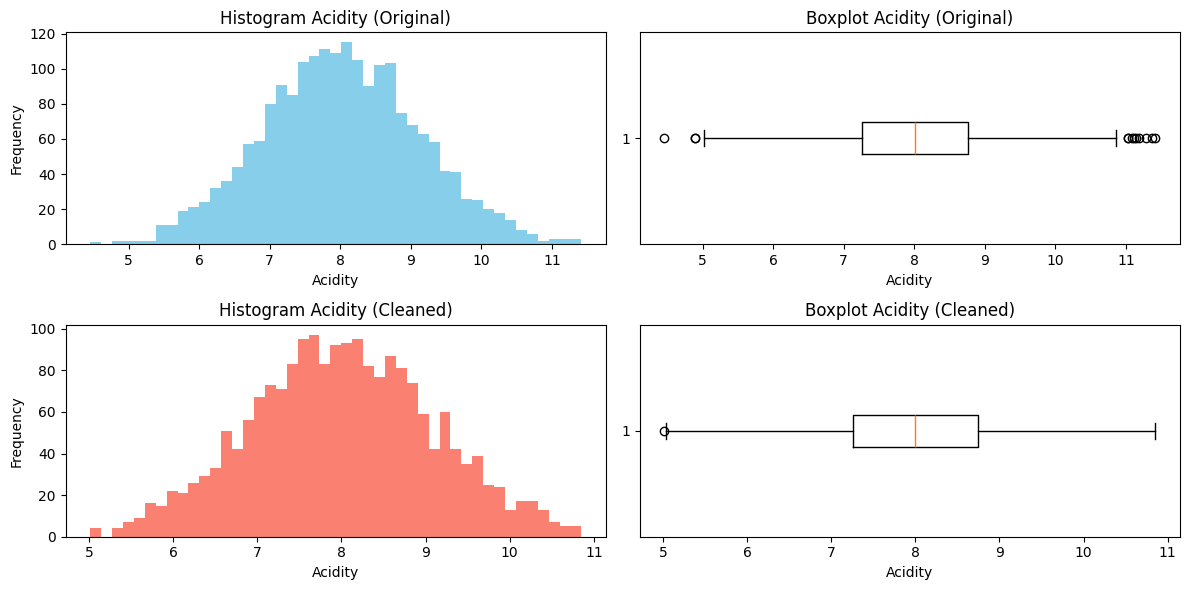

In [658]:
# Visualisasi Acidity
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 6))

# Histogram Acidity (Original)
original_acidity_bin = int(np.ceil(np.sqrt(len(acidity))))
ax1.hist(acidity, bins=original_acidity_bin, color="skyblue")
ax1.set_title("Histogram Acidity (Original)")
ax1.set_xlabel("Acidity")
ax1.set_ylabel("Frequency")

# Boxplot Acidity (Original)
ax2.boxplot(acidity, vert=False)
ax2.set_title("Boxplot Acidity (Original)")
ax2.set_xlabel("Acidity")

# Histogram Acidity (Cleaned)
cleaned_acidity_bin = int(np.ceil(np.sqrt(len(cleaned_acidity))))
ax3.hist(cleaned_acidity, bins=cleaned_acidity_bin, color="salmon")
ax3.set_title("Histogram Acidity (Cleaned)")
ax3.set_xlabel("Acidity")
ax3.set_ylabel("Frequency")

# Boxplot Acidity (Cleaned)
ax4.boxplot(cleaned_acidity, vert=False)
ax4.set_title("Boxplot Acidity (Cleaned)")
ax4.set_xlabel("Acidity")

plt.tight_layout()
plt.show()

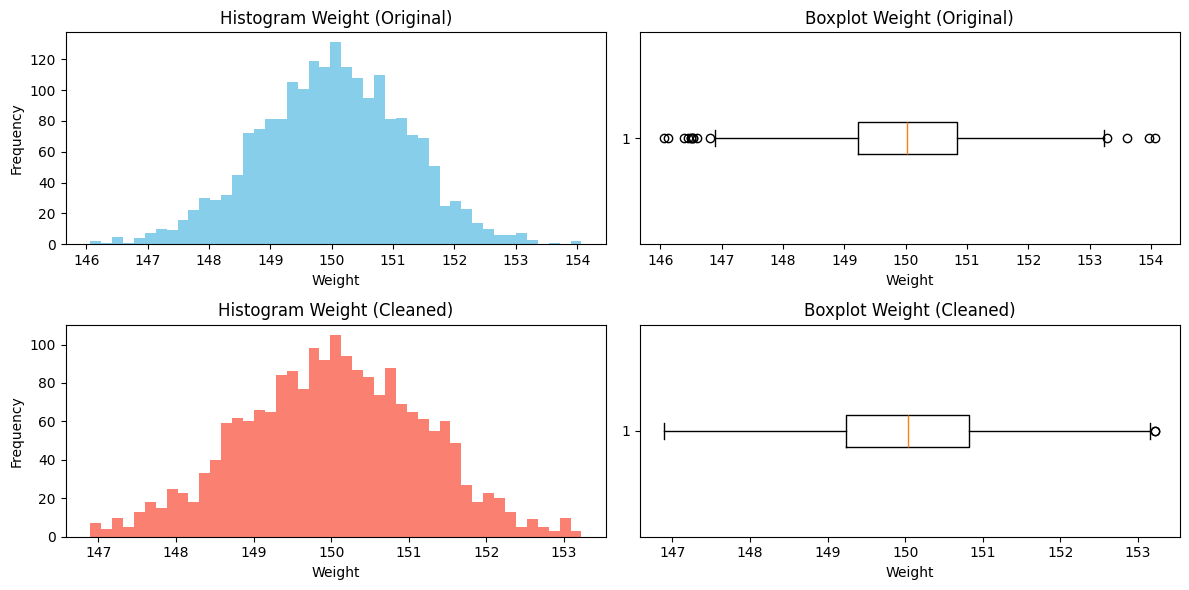

In [659]:
# Visualisasi Weight
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 6))

# Histogram (Original)
original_weight_bin = int(np.ceil(np.sqrt(len(weight))))
ax1.hist(weight, bins=original_weight_bin, color="skyblue")
ax1.set_title("Histogram Weight (Original)")
ax1.set_xlabel("Weight")
ax1.set_ylabel("Frequency")

# Boxplot (Original)
ax2.boxplot(weight, vert=False)
ax2.set_title("Boxplot Weight (Original)")
ax2.set_xlabel("Weight")

#  Histogram (Cleaned)
cleaned_weight_bin = int(np.ceil(np.sqrt(len(cleaned_weight))))
ax3.hist(cleaned_weight, bins=cleaned_weight_bin, color="salmon")
ax3.set_title("Histogram Weight (Cleaned)")
ax3.set_xlabel("Weight")
ax3.set_ylabel("Frequency")

# Boxplot (Cleaned)
ax4.boxplot(cleaned_weight, vert=False)
ax4.set_title("Boxplot Weight (Cleaned)")
ax4.set_xlabel("Weight")

plt.tight_layout()
plt.show()

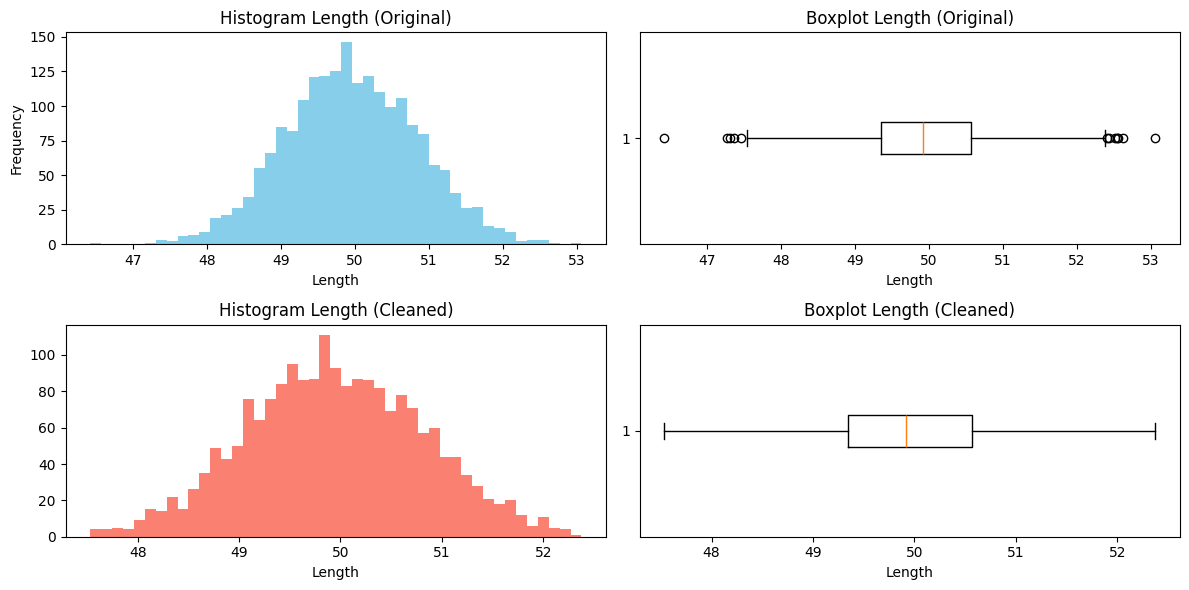

In [660]:
# Visualisasi Length
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 6))

# Histogram (Original)
original_length_bin = int(np.ceil(np.sqrt(len(length))))
ax1.hist(length, bins=original_length_bin, color="skyblue")
ax1.set_title("Histogram Length (Original)")
ax1.set_xlabel("Length")
ax1.set_ylabel("Frequency")

# Boxplot (Original)
ax2.boxplot(length, vert=False)
ax2.set_title("Boxplot Length (Original)")
ax2.set_xlabel("Length")

# Histogram (Cleaned)
cleaned_length_bin = int(np.ceil(np.sqrt(len(cleaned_length))))
ax3.hist(cleaned_length, bins=cleaned_length_bin, color="salmon")
ax3.set_title("Histogram Length (Cleaned)")
ax3.set_xlabel("Length")

# Boxplot (Cleaned)
ax4.boxplot(cleaned_length, vert=False)
ax4.set_title("Boxplot Length (Cleaned)")
ax4.set_xlabel("Length")

plt.tight_layout()
plt.show()

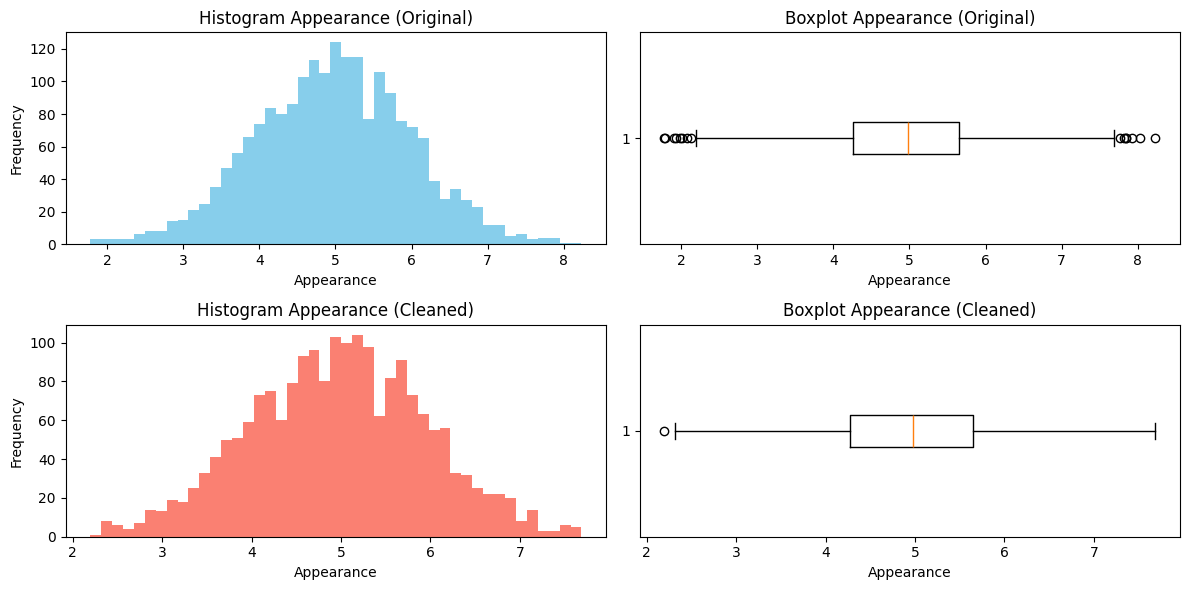

In [661]:
# Visualisasi Appearance
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 6))

# Histogram (Original)
original_appearance_bin = int(np.ceil(np.sqrt(len(appearance))))
ax1.hist(appearance, bins=original_appearance_bin, color="skyblue")
ax1.set_title("Histogram Appearance (Original)")
ax1.set_xlabel("Appearance")
ax1.set_ylabel("Frequency")

# Boxplot (Original)
ax2.boxplot(appearance, vert=False)
ax2.set_title("Boxplot Appearance (Original)")
ax2.set_xlabel("Appearance")

# Histogram (Cleaned)
cleaned_appearance_bin = int(np.ceil(np.sqrt(len(cleaned_appearance))))
ax3.hist(cleaned_appearance, bins=cleaned_appearance_bin, color="salmon")
ax3.set_title("Histogram Appearance (Cleaned)")
ax3.set_xlabel("Appearance")
ax3.set_ylabel("Frequency")

# Boxplot (Cleaned)
ax4.boxplot(cleaned_appearance, vert=False)
ax4.set_title("Boxplot Appearance (Cleaned)")
ax4.set_xlabel("Appearance")

plt.tight_layout()
plt.show()

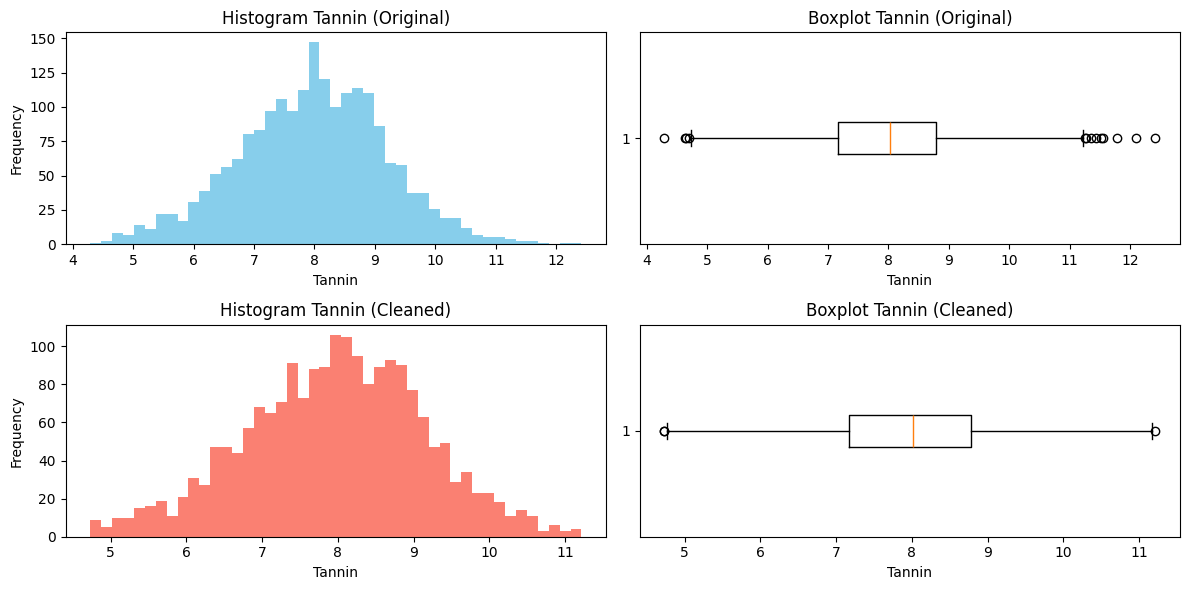

In [662]:
# Visualisasi Tannin
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 6))

# Histogram (Original)
original_tannin_bin = int(np.ceil(np.sqrt(len(tannin))))
ax1.hist(tannin, bins=original_tannin_bin, color="skyblue")
ax1.set_title("Histogram Tannin (Original)")
ax1.set_xlabel("Tannin")
ax1.set_ylabel("Frequency")

# Boxplot (Original)
ax2.boxplot(tannin, vert=False)
ax2.set_title("Boxplot Tannin (Original)")
ax2.set_xlabel("Tannin")

# Histogram (Cleaned)
cleaned_tannin_bin = int(np.ceil(np.sqrt(len(cleaned_tannin))))
ax3.hist(cleaned_tannin, bins=cleaned_acidity_bin, color="salmon")
ax3.set_title("Histogram Tannin (Cleaned)")
ax3.set_xlabel("Tannin")
ax3.set_ylabel("Frequency")

# Boxplot (Cleaned)
ax4.boxplot(cleaned_tannin, vert=False)
ax4.set_title("Boxplot Tannin (Cleaned)")
ax4.set_xlabel("Tannin")

plt.tight_layout()
plt.show()

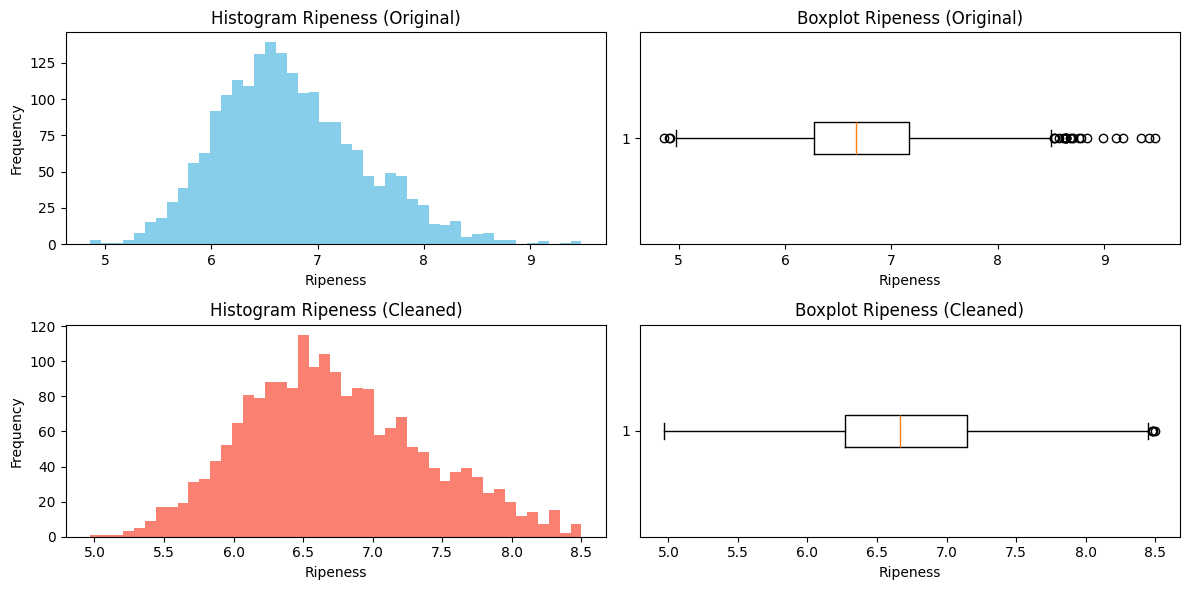

In [663]:
# Visualisasi Ripeness
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 6))

# Histogram (Original)
original_ripeness_bin = int(np.ceil(np.sqrt(len(ripeness))))
ax1.hist(ripeness, bins=original_ripeness_bin, color="skyblue")
ax1.set_title("Histogram Ripeness (Original)")
ax1.set_xlabel("Ripeness")
ax1.set_ylabel("Frequency")

# Boxplot (Original)
ax2.boxplot(ripeness, vert=False)
ax2.set_title("Boxplot Ripeness (Original)")
ax2.set_xlabel("Ripeness")

# Histogram (Cleaned)
cleaned_ripeness_bin = int(np.ceil(np.sqrt(len(cleaned_ripeness))))
ax3.hist(cleaned_ripeness, bins=cleaned_ripeness_bin, color="salmon")
ax3.set_title("Histogram Ripeness (Cleaned)")
ax3.set_xlabel("Ripeness")
ax3.set_ylabel("Frequency")

# Boxplot (Cleaned)
ax4.boxplot(cleaned_ripeness, vert=False)
ax4.set_title("Boxplot Ripeness (Cleaned)")
ax4.set_xlabel("Ripeness")

plt.tight_layout()
plt.show()

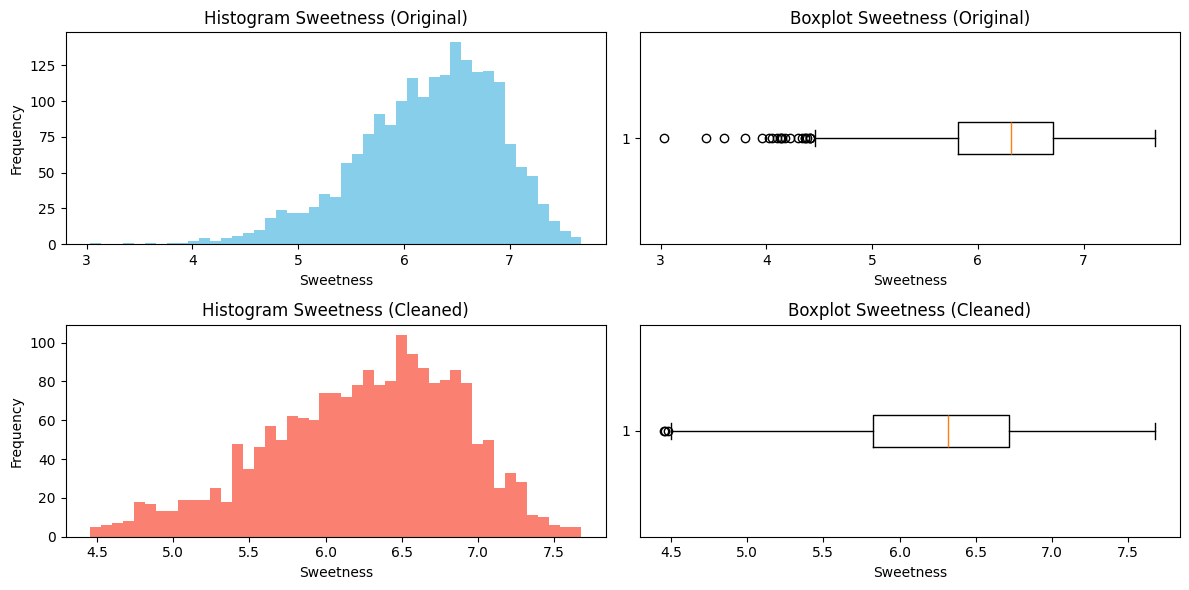

In [664]:
# Visualisasi Sweetness
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 6))

# Histogram (Original)
original_sweetness_bin = int(np.ceil(np.sqrt(len(sweetness))))
ax1.hist(sweetness, bins=original_sweetness_bin, color="skyblue")
ax1.set_title("Histogram Sweetness (Original)")
ax1.set_xlabel("Sweetness")
ax1.set_ylabel("Frequency")

# Boxplot (Original)
ax2.boxplot(sweetness, vert=False)
ax2.set_title("Boxplot Sweetness (Original)")
ax2.set_xlabel("Sweetness")

# Histogram (Cleaned)
cleaned_sweetness_bin = int(np.ceil(np.sqrt(len(cleaned_sweetness))))
ax3.hist(cleaned_sweetness, bins=cleaned_sweetness_bin, color="salmon")
ax3.set_title("Histogram Sweetness (Cleaned)")
ax3.set_xlabel("Sweetness")
ax3.set_ylabel("Frequency")

# Boxplot (Cleaned)
ax4.boxplot(cleaned_sweetness, vert=False)
ax4.set_title("Boxplot Sweetness (Cleaned)")
ax4.set_xlabel("Sweetness")

plt.tight_layout()
plt.show()

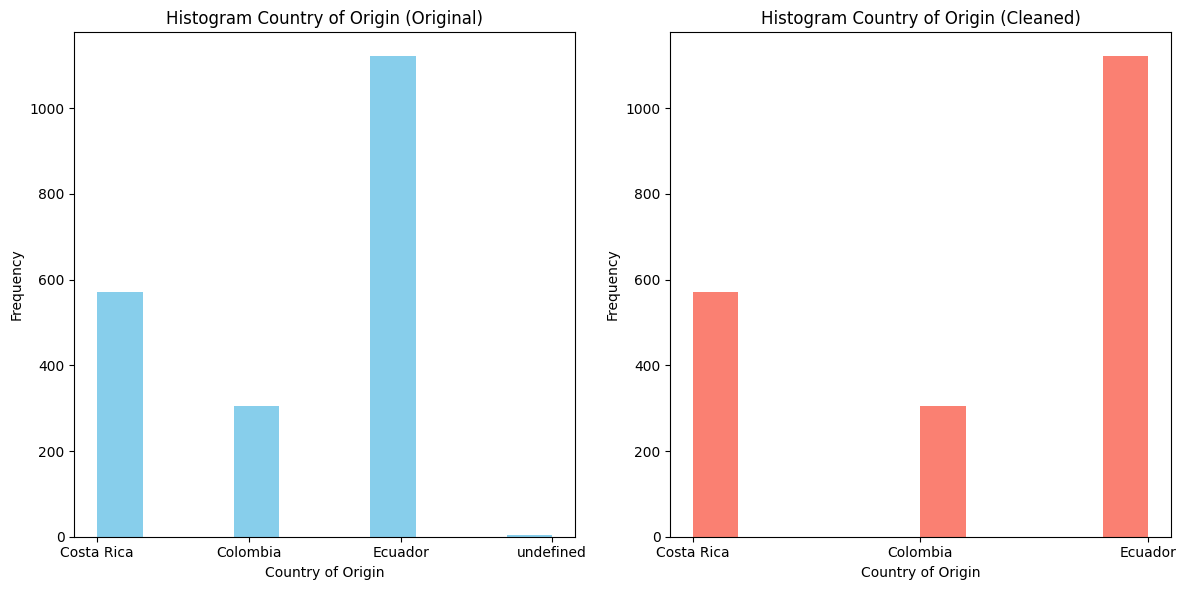

In [665]:
# Visualisasi Country_of_Origin (Cleaned)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Original bar chart
ax1.hist(country_of_origin, bins=10, color="skyblue")
ax1.set_title("Histogram Country of Origin (Original)")
ax1.set_xlabel("Country of Origin")
ax1.set_ylabel("Frequency")

# Cleaned
ax2.hist(cleaned_country_origin, bins=10, color="salmon")
ax2.set_title("Histogram Country of Origin (Cleaned)")
ax2.set_xlabel("Country of Origin")
ax2.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

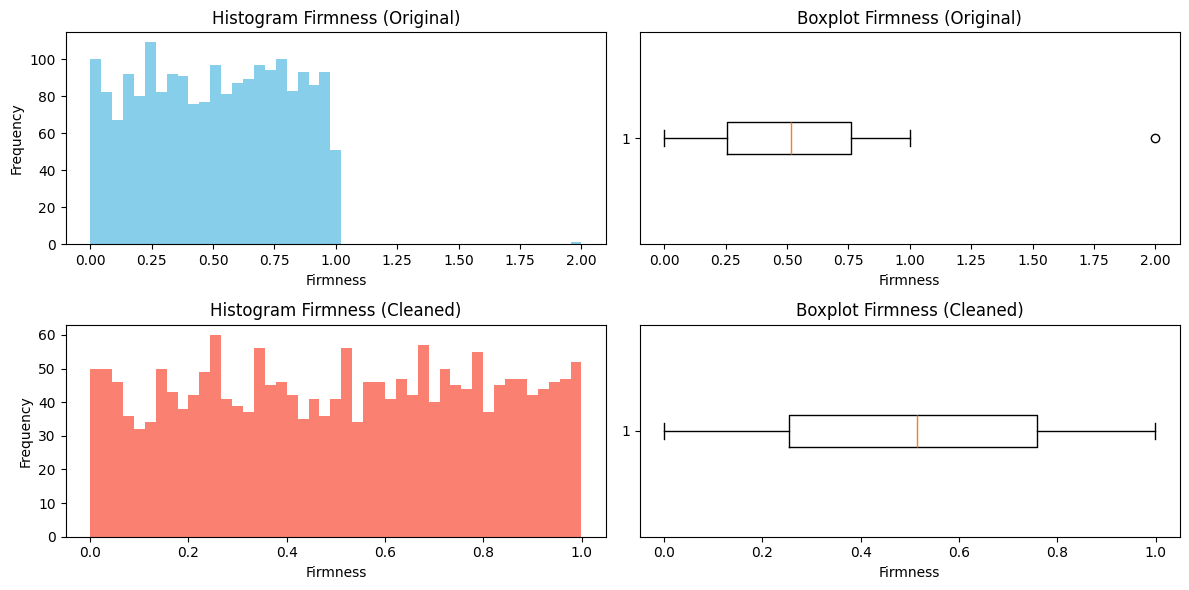

In [666]:
# Visualisasi Firmness
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 6))

# Histogram (Original)
original_firmness_bin = int(np.ceil(np.sqrt(len(firmness))))
ax1.hist(firmness, bins=original_firmness_bin, color="skyblue")
ax1.set_title("Histogram Firmness (Original)")
ax1.set_xlabel("Firmness")
ax1.set_ylabel("Frequency")

# Boxplot (Original)
ax2.boxplot(firmness, vert=False)
ax2.set_title("Boxplot Firmness (Original)")
ax2.set_xlabel("Firmness")

# Histogram (Cleaned)
cleaned_firmness_bin = int(np.ceil(np.sqrt(len(cleaned_firmness))))
ax3.hist(cleaned_firmness, bins=cleaned_firmness_bin, color="salmon")
ax3.set_title("Histogram Firmness (Cleaned)")
ax3.set_xlabel("Firmness")
ax3.set_ylabel("Frequency")

# Boxplot (Cleaned)
ax4.boxplot(cleaned_firmness, vert=False)
ax4.set_title("Boxplot Firmness (Cleaned)")
ax4.set_xlabel("Firmness")


plt.tight_layout()
plt.show()

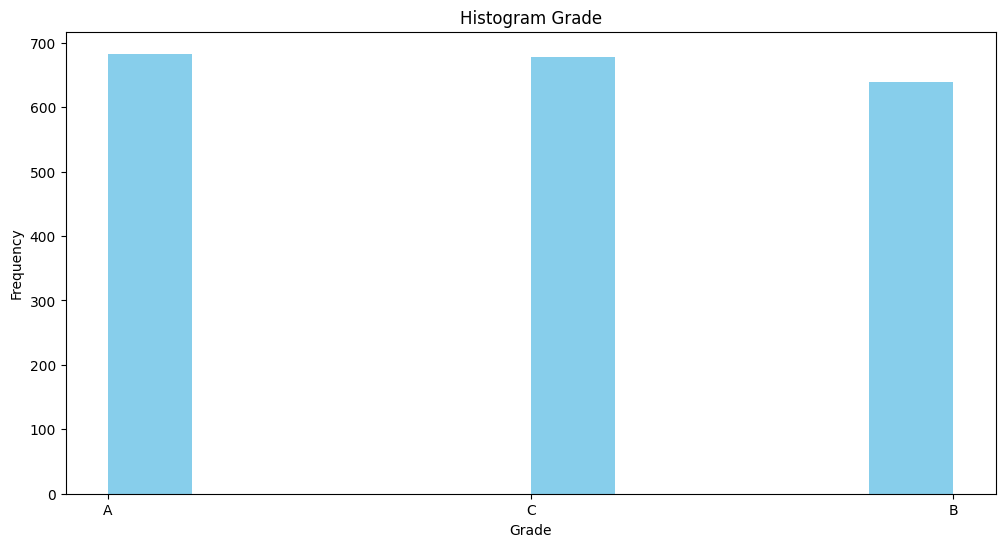

In [667]:
# Visualisasi Grade
plt.figure(figsize=(12, 6))
plt.hist(grade, bins=10, color="skyblue")
plt.title("Histogram Grade")
plt.xlabel("Grade")
plt.ylabel("Frequency")
plt.show()

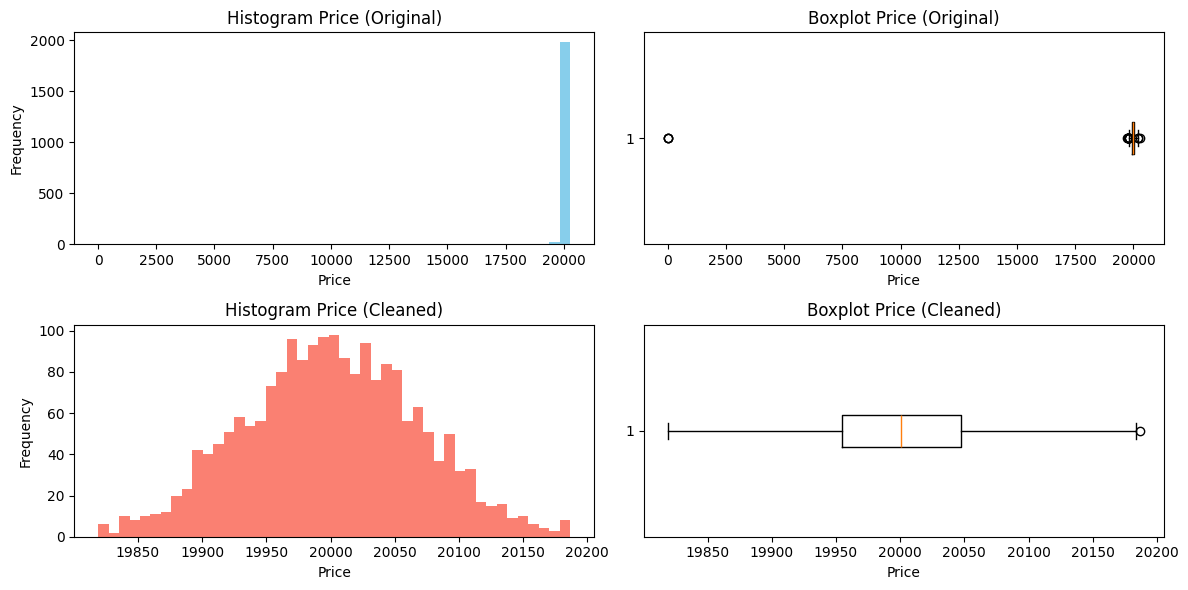

In [668]:
# Visualisasi Price
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 6))

# Histogram (Original)
original_price_bin = int(np.ceil(np.sqrt(len(price))))
ax1.hist(price, bins=original_price_bin, color="skyblue")
ax1.set_title("Histogram Price (Original)")
ax1.set_xlabel("Price")
ax1.set_ylabel("Frequency")

# Boxplot (Original)
ax2.boxplot(price, vert=False)
ax2.set_title("Boxplot Price (Original)")
ax2.set_xlabel("Price")

# Histogram (Cleaned)
cleaned_price_bin = int(np.ceil(np.sqrt(len(cleaned_price))))
ax3.hist(cleaned_price, bins=cleaned_price_bin, color="salmon")
ax3.set_title("Histogram Price (Cleaned)")
ax3.set_xlabel("Price")
ax3.set_ylabel("Frequency")

# Boxplot (Cleaned)
ax4.boxplot(cleaned_price, vert=False)
ax4.set_title("Boxplot Price (Cleaned)")
ax4.set_xlabel("Price")

plt.tight_layout()
plt.show()

# 4. Menentukan distribusi setiap kolom numerik menggunakan hasil visualisasi histogram. Apakah kolom tersebut berdistribusi normal? Jika bukan, terdistribusi seperti apa kolom tersebut?

H0: Data membentuk distribusi normal

H1: Data tidak membentuk distribusi normal

Berdasarkan uji distribusi normal, dapat disimpulkan bahwa dengan threshold α = 0.05, setiap kolom pada dataset bukan merupakan distribusi normal. Hal ini ditunjukkan oleh nilai p-value yang lebih kecil dari α, yang berarti kita memiliki bukti yang cukup untuk menolak hipotesis nol.

In [669]:
acidity_stats, acidity_pvalue = normaltest(cleaned_acidity)

print("Acidity:")
print(f"Statistics: {acidity_stats}")
print(f"P-value: {acidity_pvalue}")
print(f"Karena p-value {acidity_pvalue:.5f} < 0.05, maka hipotesis nol ditolak. Sehingga, data acidity tidak berdistribusi normal.")

Acidity:
Statistics: 12.342608412901045
P-value: 0.0020885103748093346
Karena p-value 0.00209 < 0.05, maka hipotesis nol ditolak. Sehingga, data acidity tidak berdistribusi normal.


In [670]:
weight_stats, weight_pvalue = normaltest(cleaned_weight)

print("Weight:")
print(f"Statistics: {weight_stats}")
print(f"P-value: {weight_pvalue}")
print(f"Karena p-value {weight_pvalue:.5f} < 0.05, maka hipotesis nol ditolak. Sehingga, data weight tidak berdistribusi normal.")

Weight:
Statistics: 7.120236915416322
P-value: 0.028435456115708246
Karena p-value 0.02844 < 0.05, maka hipotesis nol ditolak. Sehingga, data weight tidak berdistribusi normal.


In [671]:
length_stats, length_pvalue = normaltest(cleaned_length)

print("Length:")
print(f"Statistics: {length_stats}")
print(f"P-value: {length_pvalue}")
print(f"Karena p-value {length_pvalue:.5f} < 0.05, maka hipotesis nol ditolak. Sehingga, data length tidak berdistribusi normal.")

Length:
Statistics: 12.339359612344357
P-value: 0.0020919057085874667
Karena p-value 0.00209 < 0.05, maka hipotesis nol ditolak. Sehingga, data length tidak berdistribusi normal.


In [672]:
appearance_stats, appearance_pvalue = normaltest(cleaned_appearance)

print("Appearance:")
print(f"Statistics: {appearance_stats}")
print(f"P-value: {appearance_pvalue}")
print(f"Karena p-value {appearance_pvalue:.5f} < 0.05, maka hipotesis nol ditolak. Sehingga, data appearance tidak berdistribusi normal.")

Appearance:
Statistics: 6.536062019364938
P-value: 0.038081335084460724
Karena p-value 0.03808 < 0.05, maka hipotesis nol ditolak. Sehingga, data appearance tidak berdistribusi normal.


In [673]:
tanning_stats, tanning_pvalue = normaltest(cleaned_tannin)

print("Tannin:")
print(f"Statistics: {tanning_stats}")
print(f"P-value: {tanning_pvalue}")
print(f"Karena p-value {tanning_pvalue:.5f} < 0.05, maka hipotesis nol ditolak. Sehingga, data tannin tidak berdistribusi normal.")

Tannin:
Statistics: 8.599526992246211
P-value: 0.013571768408513565
Karena p-value 0.01357 < 0.05, maka hipotesis nol ditolak. Sehingga, data tannin tidak berdistribusi normal.


In [674]:
ripeness_stats, ripeness_pvalue = normaltest(cleaned_ripeness)

print("Ripeness:")
print(f"Statistics: {ripeness_stats}")
print(f"P-value: {ripeness_pvalue}")
print(f"Karena p-value {ripeness_pvalue:.1f} < 0.05, maka hipotesis nol ditolak. Sehingga, data ripeness tidak berdistribusi normal.")

Ripeness:
Statistics: 42.64513622681312
P-value: 5.491946885082756e-10
Karena p-value 0.0 < 0.05, maka hipotesis nol ditolak. Sehingga, data ripeness tidak berdistribusi normal.


In [675]:
sweetness_stats, sweetness_pvalue = normaltest(cleaned_sweetness)

print("Sweetness:")
print(f"Statistics: {sweetness_stats}")
print(f"P-value: {sweetness_pvalue}")
print(f"Karena p-value {sweetness_pvalue:.1f} < 0.05, maka hipotesis nol ditolak. Sehingga, data sweetness tidak berdistribusi normal.")

Sweetness:
Statistics: 66.32883413457631
P-value: 3.9525436260426724e-15
Karena p-value 0.0 < 0.05, maka hipotesis nol ditolak. Sehingga, data sweetness tidak berdistribusi normal.


In [676]:
firmness_stats, firmness_pvalue = normaltest(cleaned_firmness)

print("Firmness:")
print(f"Statistics: {firmness_stats}")
print(f"P-value: {firmness_pvalue}")
print(f"Karena p-value {firmness_pvalue} < 0.05, maka hipotesis nol ditolak. Sehingga, data firmness tidak berdistribusi normal.")

Firmness:
Statistics: 1613.028585533847
P-value: 0.0
Karena p-value 0.0 < 0.05, maka hipotesis nol ditolak. Sehingga, data firmness tidak berdistribusi normal.


In [677]:
price_stats, price_pvalue = normaltest(cleaned_price)

print("Price:")
print(f"Statistics: {price_stats}")
print(f"P-value: {price_pvalue}")
print(f"Karena p-value {price_pvalue:.5f} < 0.05, maka hipotesis nol ditolak. Sehingga, data price tidak berdistribusi normal.")

Price:
Statistics: 8.45280964500458
P-value: 0.014604803135276095
Karena p-value 0.01460 < 0.05, maka hipotesis nol ditolak. Sehingga, data price tidak berdistribusi normal.


# 5. Hipotesis 1 sampel

## Perusahaan menerima beberapa keluhan bahwa buah pisang yang mereka terima akhir-akhir ini cukup asam. Dapatkah anda mengecek apakah rata-rata nilai Acidity di atas 6?

1. Penentuan hipotesis null.

    H_0: Rata-rata nilai acidity = 6

2. Penentuan hipotesis alternatif.

    H_1: Rata-rata nilai acidity > 6

3. Penentuan tingkat signifikan.

    α = 0,05

4. Penentuan uji statistik dan daerah kritis. (Nilai numerik diprint dibawah)
  
    Uji statistik: z = (x̄ - μ_0)/(σ/√n)

    Dengan Central Limit Theorem, distribusi sample akan mengikuti distribusi normal as long as jumlah sample yang diambil besar. Kita pilih random sampling sebanyak n = 100.

    Daerah kritis:

    P(z > z_c) = 0,05

    1 - P(z < z_c) = 0,05

    P(z < z_c) = 0,95

    x̄_c = z_c * σ/√n + μ_0

5. Perhitungan nilai uji statistik dan p-value. (Nilai numerik diprint dibawah bergantung nilai sample)

    z_test = (x̄_test - μ_0)/(σ/√n)
    
    p-value = (1 - P(z < abs(z_test)))


6. Pengambilan Keputusan (Keputusan diprint dibawah bergantung pengambilan sample)

In [678]:
# Nilai2 penting
alpha = 0.05
sample_size = 100
std_cleaned_acidity = np.std(cleaned_acidity)
mean_cleaned_acidity = np.mean(cleaned_acidity)

# 4. Nilai kritis
z_critical = norm.ppf(1 - alpha)
x_critical = mean_cleaned_acidity + z_critical * std_cleaned_acidity / np.sqrt(sample_size)  
print(f"z critical: {z_critical}")
print(f"x critical: {x_critical}")

# Pengambilan sample sebanyak n = 100 dari cleaned_acidity
sample_acidity = np.random.choice(cleaned_acidity, size=100, replace=False)
sample_mean = np.mean(sample_acidity)

# 5. Perhitungan uji statistik dan p value
z_test = (sample_mean - mean_cleaned_acidity) / (std_cleaned_acidity / np.sqrt(sample_size))
p_value = 1 - norm.cdf(np.abs(z_test))
print(f"sample mean: {sample_mean}")
print(f"z test: {z_test}")
print(f"p-value: {p_value}")

# 6. Pengambilan keputusan
if (p_value > alpha):
    print(f"Keputusan: Tidak cukup bukti untuk menolak H0 sehingga rata-rata sample acidity 6.")
else:
    print(f"Keputusan: Menolak H0 sehingga rata-rata sample acidity bukan 6.")

z critical: 1.6448536269514722
x critical: 8.183153511285733
sample mean: 7.954065398784082
z test: -0.4751324667043511
p-value: 0.3173462793276881
Keputusan: Tidak cukup bukti untuk menolak H0 sehingga rata-rata sample acidity 6.


## Supplier menjanjikan bahwa rata-rata berat buah pisang adalah 150 gram. Pemilik mencurigai kebenaran hal ini. Apakah rata-rata buah pisang yang mereka kirim tidak bernilai 150 gram?

1. Penentuan hipotesis null.

    H_0: Rata-rata berat buah pisang = 150

2. Penentuan hipotesis alternatif.

    H_1: Rata-rata berat buah pisang ≠ 150

3. Penentuan tingkat signifikan.

    α = 0,05

4. Penentuan uji statistik dan daerah kritis. (Nilai numerik diprint dibawah)
  
    Uji statistik: z = (x̄ - μ_0)/(σ/√n)

    Dengan Central Limit Theorem, distribusi sample akan mengikuti distribusi normal as long as jumlah sample yang diambil besar. Kita pilih random sampling sebanyak n = 100.

    Daerah kritis:

    P(z < z_c1) = 0,05/2 = 0,025

    P(z > z_c2) = 0,05/2 = 0,025

    x̄_c1 = μ_0 + z_c1 * σ/√n

    x̄_c2 = μ_0 + z_c2 * σ/√n

5. Perhitungan nilai uji statistik dan p-value. (Nilai numerik diprint dibawah bergantung nilai sample)

    z_test = (x̄_test - μ_0)/(σ/√n)
    
    p-value = 2 * (1 - P(z < abs(z_test)))

6. Pengambilan Keputusan (Keputusan diprint dibawah bergantung pengambilan sample)

In [679]:
# Nilai-nilai penting
alpha = 0.05
sample_size = 100
std_cleaned_weight = np.std(cleaned_weight)
mean_cleaned_weight = np.mean(cleaned_weight)

# 4. Nilai kritis
z_critical_1 = norm.ppf(alpha / 2)
z_critical_2 = norm.ppf(1 - alpha / 2)
x_critical_1 = mean_cleaned_weight + z_critical_1 * std_cleaned_weight / np.sqrt(sample_size)
x_critical_2 = mean_cleaned_weight + z_critical_2 * std_cleaned_weight / np.sqrt(sample_size)
print(f"z critical 1: {z_critical_1}")
print(f"z critical 2: {z_critical_2}")
print(f"x critical 1: {x_critical_1}")
print(f"x critical 2: {x_critical_2}")

# Pengambilan sample sebanyak n = 100 dari cleaned_weight
sample_weight = np.random.choice(cleaned_weight, size=100, replace=False)
sample_mean = np.mean(sample_weight)

# 5. Perhitungan uji statistik dan p value
z_test = (sample_mean - mean_cleaned_weight) / (std_cleaned_weight / np.sqrt(sample_size))
p_value = 2 * (1 - norm.cdf(np.abs(z_test)))
print(f"sample mean: {sample_mean}")
print(f"z-test: {z_test}")
print(f"p-value: {p_value}")

# 6. Pengambilan keputusan
if (p_value > alpha):
    print(f"Keputusan: Tidak cukup bukti untuk menolak H0 sehingga rata-rata sample weight 0.5.")
else:
    print(f"Keputusan: Menolak H0 sehingga rata-rata sample weight bukan 0.5.")

z critical 1: -1.9599639845400545
z critical 2: 1.959963984540054
x critical 1: 149.7946959593526
x critical 2: 150.24930380046627
sample mean: 149.98961140934506
z-test: -0.27927470703098867
p-value: 0.7800340152394645
Keputusan: Tidak cukup bukti untuk menolak H0 sehingga rata-rata sample weight 0.5.


## Periksalah apakah rata-rata panjang buah pisang 10 baris terakhir tidak sama dengan 49!

1. Penentuan hipotesis null.

    H_0: Rata-rata berat 10 buah pisang terakhir = 49

2. Penentuan hipotesis alternatif.

    H_1: Rata-rata berat 10 buah pisang terakhir ≠ 49

3. Penentuan tingkat signifikan.

    α = 0,05

4. Penentuan uji statistik dan daerah kritis. (Nilai numerik diprint dibawah)
  
    Uji statistik: z = (x̄ - μ_0)/(σ/√n)

    Dengan Central Limit Theorem, distribusi sample akan mengikuti distribusi normal as long as jumlah sample yang diambil besar. Kita pilih sampling sebanyak n = 10 (10 pisang terakhir).

    Daerah kritis:

    P(z < z_c1) = 0,05/2 = 0,025

    P(z > z_c2) = 0,05/2 = 0,025

    x̄_c1 = μ_0 + z_c1 * σ/√n

    x̄_c2 = μ_0 + z_c2 * σ/√n

5. Perhitungan nilai uji statistik dan p-value. (Nilai numerik diprint dibawah bergantung nilai sample)

    z_test = (x̄_test - μ_0)/(σ/√n)
    
    p-value = 2 * (1 - P(z < abs(z_test)))

6. Pengambilan Keputusan (Keputusan diprint dibawah bergantung pengambilan sample)

In [680]:
# Nilai-nilai penting
alpha = 0.05
sample_size = 10
std_cleaned_weight = np.std(cleaned_weight)
mean_cleaned_weight = np.mean(cleaned_weight)

# 4. Nilai kritis
z_critical_1 = norm.ppf(alpha / 2)
z_critical_2 = norm.ppf(1 - alpha / 2)
x_critical_1 = mean_cleaned_weight + z_critical_1 * std_cleaned_weight / np.sqrt(sample_size)
x_critical_2 = mean_cleaned_weight + z_critical_2 * std_cleaned_weight / np.sqrt(sample_size)
print(f"z critical 1: {z_critical_1}")
print(f"z critical 2: {z_critical_2}")
print(f"x critical 1: {x_critical_1}")
print(f"x critical 2: {x_critical_2}")

# Pengambilan sample sebanyak n = 10 dari cleaned_weight (10 terakhir)
sample_weight = cleaned_weight[-10:]
sample_mean = np.mean(sample_weight)

# 5. Perhitungan uji statistik dan p value
z_test = (sample_mean - mean_cleaned_weight) / (std_cleaned_weight / np.sqrt(sample_size))
p_value = 2 * (1 - norm.cdf(np.abs(z_test)))
print(f"sample mean: {sample_mean}")
print(f"z-test: {z_test}")
print(f"p-value: {p_value}")

# 6. Pengambilan keputusan
if (p_value > alpha):
    print(f"Keputusan: Tidak cukup bukti untuk menolak H0 sehingga rata-rata berat 10 pisang terakhir sama dengan 49.")
else:
    print(f"Keputusan: Menolak H0 sehingga rata-rata berat 10 pisang terakhir tidak sama dengan 49.")

z critical 1: -1.9599639845400545
z critical 2: 1.959963984540054
x critical 1: 149.3032017698639
x critical 2: 150.74079798995496
sample mean: 150.5784365817542
z-test: 1.5172492526767003
p-value: 0.12920376540649303
Keputusan: Tidak cukup bukti untuk menolak H0 sehingga rata-rata berat 10 pisang terakhir sama dengan 49.


## Apakah proporsi nilai Tannin yang lebih besar dari 8 tidak sama dengan 55% dari total dataset?

1. Penentuan hipotesis null.

    H_0: P(x > 8) = 0,55

2. Penentuan hipotesis alternatif.

    H_1: P(x > 8) ≠ 0,55

3. Penentuan tingkat signifikan.

    α = 0,05

4. Penentuan uji statistik dan daerah kritis. (Nilai numerik diprint dibawah)
  
    Uji statistik: z = (x̄ - μ_0)/(σ/√n)

    Dengan Central Limit Theorem, distribusi sample akan mengikuti distribusi normal as long as jumlah sample yang diambil besar. Kita pilih random sampling sebanyak n = 100 orang.
    
    Daerah kritis:

    P(z < z_c1) = 0,05/2 = 0,025

    P(z > z_c2) = 0,05/2 = 0,025

    x̄_c1 = μ_0 + z_c1 * σ/√n

    x̄_c2 = μ_0 + z_c2 * σ/√n

5. Perhitungan nilai uji statistik dan p-value. (Nilai numerik diprint dibawah bergantung nilai sample)

    z_test = (x̄_test - μ_0)/(σ/√n)
    
    p-value = 2 * (1 - P(z < abs(z_test)))

6. Pengambilan Keputusan (Keputusan diprint dibawah bergantung pengambilan sample)

In [706]:
# Nilai-nilai penting
alpha = 0.05
sample_size = 100
std_cleaned_length = np.std(cleaned_length)
mean_cleaned_length = np.mean(cleaned_length)

# 4. Nilai kritis
z_critical_1 = norm.ppf(alpha / 2)
z_critical_2 = norm.ppf(1 - alpha / 2)
x_critical_1 = mean_cleaned_length + z_critical_1 * std_cleaned_length / np.sqrt(sample_size)
x_critical_2 = mean_cleaned_length + z_critical_2 * std_cleaned_length / np.sqrt(sample_size)

print(f"z critical 1: {z_critical_1}")
print(f"z critical 2: {z_critical_2}")
print(f"x critical 1: {x_critical_1}")
print(f"x critical 2: {x_critical_2}")

# Pengambilan sample sebanyak n = 100 dari cleaned_length
sample_length = np.random.choice(cleaned_length, size=100, replace=False)
sample_mean = np.mean(sample_length)

# 5. Perhitungan uji statistik dan p value
z_test = (sample_mean - mean_cleaned_length) / (std_cleaned_length / np.sqrt(sample_size))
p_value = 2 * (1 - norm.cdf(np.abs(z_test)))

print(f"sample mean: {sample_mean}")
print(f"z-test: {z_test}")
print(f"p-value: {p_value}")

# 6. Pengambilan keputusan
if (p_value > alpha):
    print(f"Keputusan: Tidak cukup bukti untuk menolak H0 sehingga proporsi nilai tannin yang lebih dari 8 adalah 0,55.")
else:
    print(f"Keputusan: Menolak H0 sehingga proporsi nilai tannin yang lebih dari 8 bukan 0,55.")

z critical 1: -1.9599639845400545
z critical 2: 1.959963984540054
x critical 1: 49.777262613600506
x critical 2: 50.11900382529155
sample mean: 50.0552409097105
z-test: 1.2285741854009775
p-value: 0.21923149911628803
Keputusan: Tidak cukup bukti untuk menolak H0 sehingga proporsi nilai tannin yang lebih dari 8 adalah 0,55.
